In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\insurance data set.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data exploration

In [4]:
df.shape

(1338, 7)

In [5]:
df.size

9366

In [6]:
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
1325,61,male,33.535,0,no,northeast,13143.33665
95,28,female,37.620,1,no,southeast,3766.88380
540,34,female,38.000,3,no,southwest,6196.44800
677,60,male,31.350,3,yes,northwest,46130.52650


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [9]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [12]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
continious = df.drop(columns = ['smoker','region','sex','children']).columns.to_list()
continious

['age', 'bmi', 'charges']

In [15]:
df[continious].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


# Data Preprocessing

In [16]:
df.duplicated().sum()

1

In [17]:
df = df.drop_duplicates()

In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df[continious].skew() 

age        0.054781
bmi        0.283914
charges    1.515391
dtype: float64

* # we convert the data into normal distribution using  log 

In [20]:
# df['charges'] = np.log1p(df['charges'])

In [21]:
df[continious].describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


In [22]:
df['charges'].sort_values(ascending=False).head()

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
Name: charges, dtype: float64

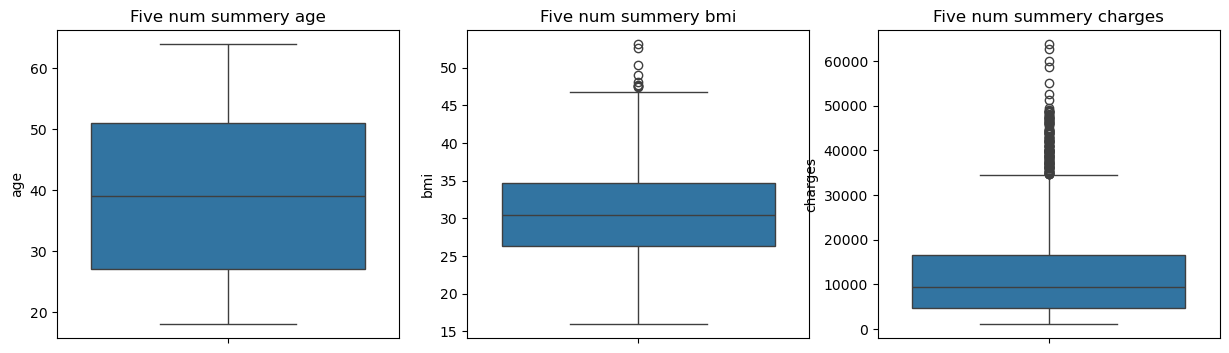

In [23]:
plt.figure(figsize= (15,4))
for index ,i in enumerate(continious):
    plt.subplot(1,3,index+1)
    sns.boxplot(df[i])
    plt.title(f'Five num summery {i}')
plt.show()

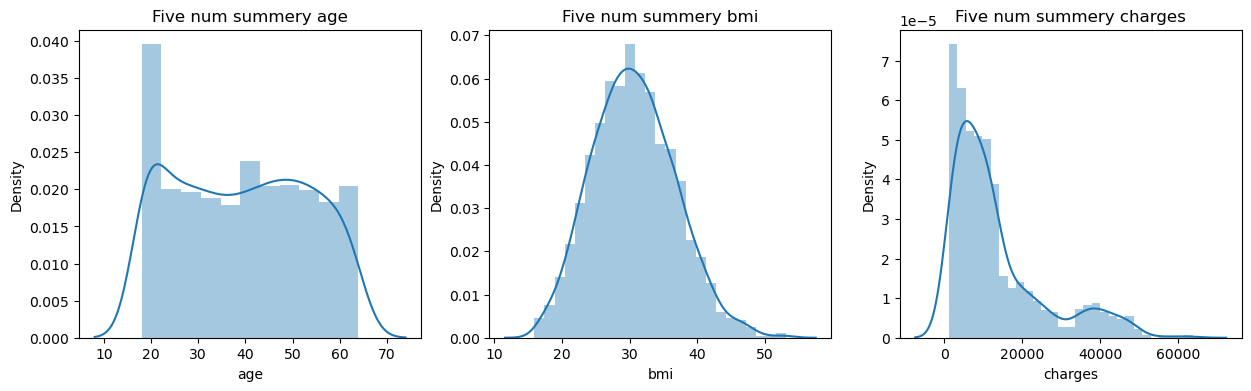

In [24]:
plt.figure(figsize= (15,4))
for index ,i in enumerate(continious):
    plt.subplot(1,3,index+1)
    sns.distplot(df[i],kde = True)
    plt.title(f'Five num summery {i}')
plt.show()

# Data Visulization

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
df.drop(columns ='region',inplace = True)

* after observation of the data region is not much importent columsn because its not relate this 

### Nominal Encoding

In [27]:
df.sample()

,age,sex,bmi,children,smoker,charges
304,57,female,38.0,2,no,12646.207


In [28]:
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True).astype(int)

In [29]:
df.sample(4)

,age,bmi,children,charges,sex_male,smoker_yes
664,64,22,0,27037,0,1
23,34,31,1,37701,0,1
1237,58,28,0,12224,0,0
755,31,27,2,5031,1,0


In [30]:
X = df.drop(columns = 'charges')
y = df['charges']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# modelling 

### hyper parameter tuning

In [36]:
model = Ridge()
param_grid = {'alpha':list(range(1,10))}

grid  = GridSearchCV(model,param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'alpha': 2}

### Apply Ridge

In [33]:
# modelling
from sklearn.linear_model import Ridge
ridge_best = Ridge(alpha = 1)
ridge_best.fit(X_train,y_train)

# Prediction 
y_pred_train = ridge_best.predict(X_train)

# train r2_score
from sklearn.metrics import r2_score
print('Train_r2_score',r2_score(y_train,y_pred_train))

# cross validation score
from sklearn.model_selection import cross_val_score 
print('cross_val_score',cross_val_score(ridge_best,X_train,y_train,cv = 5).mean())

# prediction
y_pred_test = ridge_best.predict(X_test)

# test r2_score
r2_score
print('test_r2_score',r2_score(y_test,y_pred_test))                                                                                                      

Train_r2_score 0.7291441903806786
cross_val_score 0.7256138448986306
test_r2_score 0.8036356878936572


# predict on new data 

In [ ]:
input_data = {'age':26
             ,'bmi':25,'children':2,'sex':'male','smoker':'yes','region':'northwest','charges':[200000]}

In [ ]:
inp_test  = pd.DataFrame(input_data,index = [0])
inp_test

In [ ]:
inp_test.drop(columns ='region',inplace = True)
inp_test

In [ ]:
inp_test = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True).astype(int)